<div style="text-align: center; background-color: #0A6EBD; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 40px; font-size: 28px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Final Project - Introduction To Data Science @ FIT-HCMUS, VNU-HCM
</div>

<div style="text-align: center; background-color: #5A96E3; font-family: 'Trebuchet MS', Arial, sans-serif; color: white; padding: 20px; font-size: 30px; font-weight: bold; border-radius: 0 0 0 0; box-shadow: 0px 6px 8px rgba(0, 0, 0, 0.2);">
  Stage 03 - Exploratory data analysis
</div>

## 1. Import

In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 2. Exploring data

### Read cleaned data from file

In [2]:
clean_tft_df = pd.read_csv('../data/processed/Group25_TFT_processed.csv')
clean_tft_df.head()

,Riot Games Name,Riot Games Tag Line,Summoner Level,Summoner Points,Summoner Wins,Summoner Losses,Is Veteran?,Is Inactive?,Is Fresh Blood?,Is Hot Streak?,Summoner Tier
0,Victorious,HLG,762,602,122,87,False,False,True,False,Challenger
1,mikej,VN2,221,703,231,185,False,False,True,False,Challenger
2,Duy Pingboda,9999,27,704,122,83,False,False,True,False,Challenger
3,Top1GamingTopTop,6789,1,613,115,81,False,False,True,False,Challenger
4,kobisao,VN2,380,540,82,45,False,False,True,False,Challenger


### Calculate the number of rows and columns

In [3]:
num_rows, num_cols = clean_tft_df.shape
print(f'Number of rows: {num_rows}\nNumber of columns: {num_cols}')

Number of rows: 1350
Number of columns: 11


### Relationship between 2 variables

In [4]:
numerical_df = clean_tft_df.select_dtypes(include=[np.number])
numerical_df

,Summoner Level,Summoner Points,Summoner Wins,Summoner Losses
0,762,602,122,87
1,221,703,231,185
2,27,704,122,83
3,1,613,115,81
4,380,540,82,45
...,...,...,...,...
1345,122,251,113,98
1346,19,327,110,77
1347,61,509,182,157
1348,124,314,92,68


In [5]:
# Correlation                
df_corr = numerical_df.corr()
df_corr

,Summoner Level,Summoner Points,Summoner Wins,Summoner Losses
Summoner Level,1.000000,-0.047068,-0.025643,-0.009351
Summoner Points,-0.047068,1.000000,0.222677,0.088271
Summoner Wins,-0.025643,0.222677,1.000000,0.968982
Summoner Losses,-0.009351,0.088271,0.968982,1.000000


In [6]:
# Removing the upper triangle cells
mask = np.triu(np.ones_like(df_corr, dtype=bool))
# Remove two cells with values 1 in [0, 0] and [3, 3] in matrix
mask = mask[1:, :-1]
df_corr = df_corr.iloc[1:, :-1]
df_corr

,Summoner Level,Summoner Points,Summoner Wins
Summoner Points,-0.047068,1.000000,0.222677
Summoner Wins,-0.025643,0.222677,1.000000
Summoner Losses,-0.009351,0.088271,0.968982


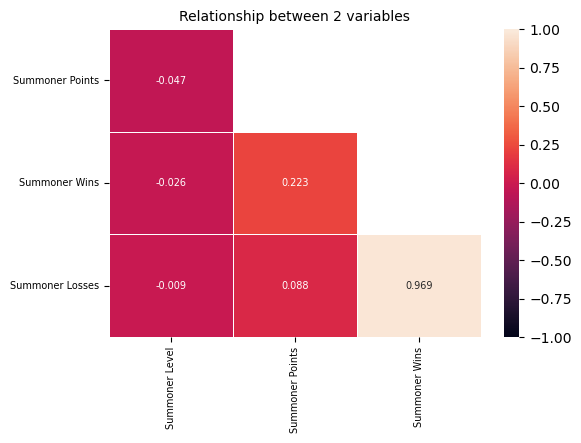

In [7]:
fig, ax = plt.subplots(figsize=(6, 4))

sns.heatmap(data=df_corr, mask=mask,
           annot=True, annot_kws={"fontsize":7}, fmt='.3f',
           vmin=-1, vmax=1,
           linecolor='white', linewidths=0.5);

yticks = [col for col in df_corr.index]
xticks = [col for col in df_corr.columns]

ax.set_title('Relationship between 2 variables', fontsize=10)
ax.set_yticklabels(yticks, rotation=0, fontsize=7);
ax.set_xticklabels(xticks, rotation=90, fontsize=7);

- Base on upper figure about correlation, we can observe that only 'Summoner Wins' and 'Summoner Loses' have a strong relationship.
- While the others have a weak relationship or no relationship at all.

## 3. Making a question

### What is a distribution of each tier in `Summoner Tier` category?

In [8]:
grandmaster_df = clean_tft_df[clean_tft_df['Summoner Tier'] == 'Grandmaster']
gm_min = grandmaster_df['Summoner Points'].min() 
gm_max = grandmaster_df['Summoner Points'].max()
print(f'Grandmaster min points: {gm_min}, '
      f'Grandmaster max points: {gm_max}')

Grandmaster min points: 214, Grandmaster max points: 513


In [9]:
challenger_df = clean_tft_df[clean_tft_df['Summoner Tier'] == 'Challenger']
cl_min = challenger_df['Summoner Points'].min() 
cl_max = challenger_df['Summoner Points'].max()
print(f'Challenger min points: {cl_min}, '
      f'Challenger max points: {cl_max}')

Challenger min points: 513, Challenger max points: 1806


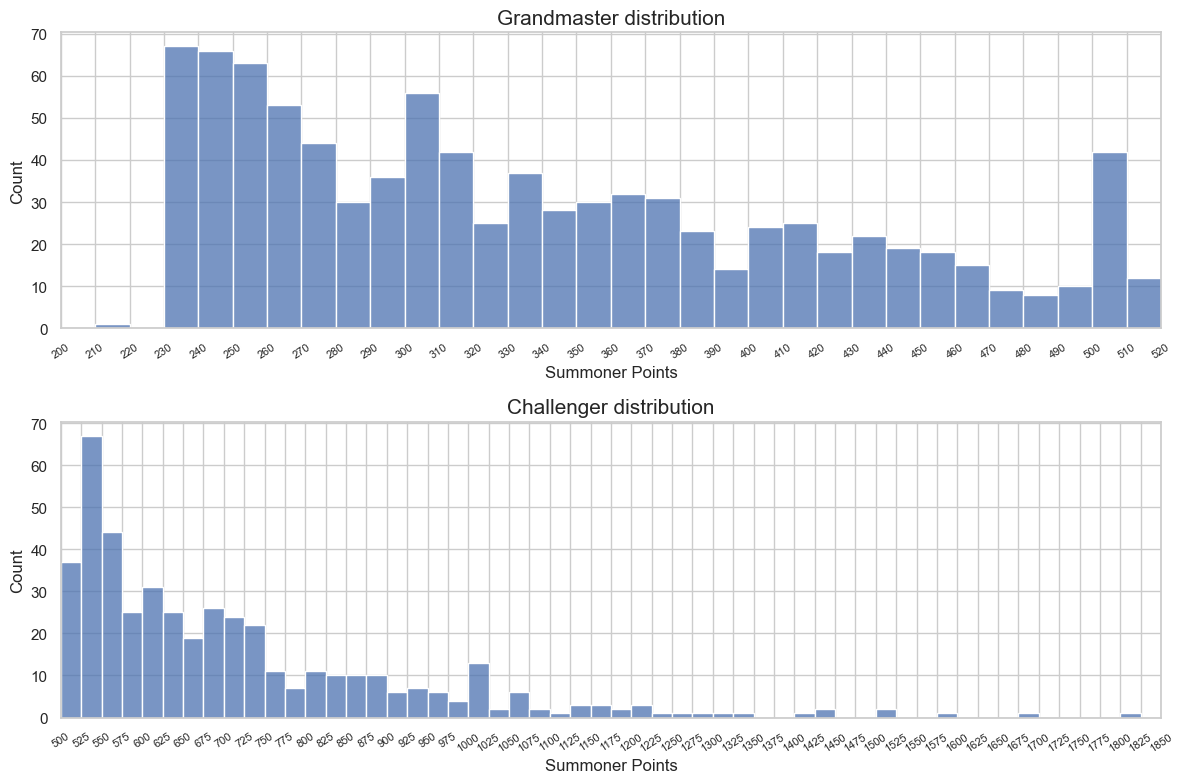

In [10]:
gm_bins = np.arange(200, 521, 10)
cl_bins = np.arange(500, 1851, 25)
sns.set_theme(style="whitegrid")

data = [grandmaster_df['Summoner Points'], challenger_df['Summoner Points']]
bins = [gm_bins, cl_bins]
titles = ['Grandmaster distribution', 'Challenger distribution']

fig, ax = plt.subplots(nrows=2, figsize=(12, 8))

for i, (data, bins, title) in enumerate(zip(data, bins, titles)):
    sns.histplot(data=data, bins=bins, ax=ax[i])
    ax[i].set_title(title, fontsize=15)
    ax[i].set_xticks(bins)
    ax[i].set_xticklabels(bins, rotation=33, fontsize=8)
    ax[i].set_xlim(bins[0], bins[-1])

plt.tight_layout()
plt.show()

- Grandmaster distribution: Most players have points ranging from 230 to 280.
- Challenger distribution: Most players have points ranging from 500 to 600, with the highest between 525 and 550.

### How do the distributions of 'Summoner Wins' and 'Summoner Losses' vary among different tiers within the 'Summoner Tier' category?

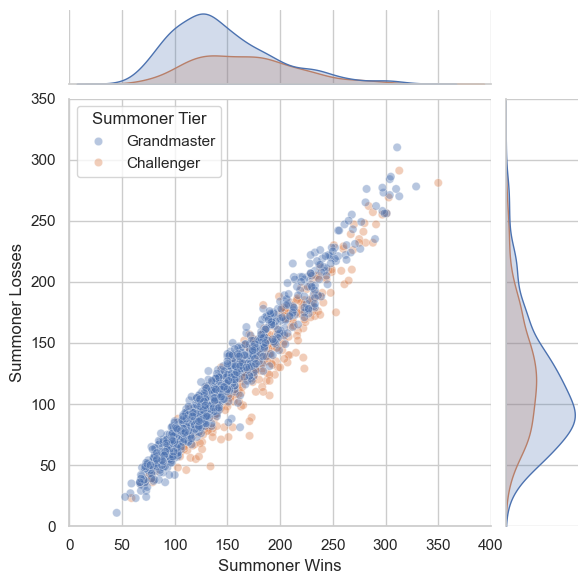

In [11]:
sns.jointplot(data=clean_tft_df,
              x='Summoner Wins', y='Summoner Losses',
              hue='Summoner Tier', alpha=0.4,
              hue_order=['Grandmaster', 'Challenger'])
plt.xlim(0, 400)
plt.ylim(0, 350)

plt.show()

### What is the distribution of Summoner Points among Grandmaster and Challenger tier players based on whether they are currently on a hot streak or not?

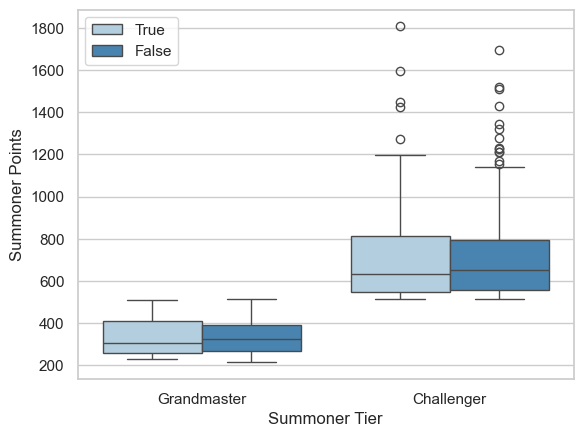

In [12]:
sns.boxplot(data=clean_tft_df, x='Summoner Tier', y='Summoner Points', 
            hue='Is Hot Streak?', hue_order=[True, False],
            order=['Grandmaster', 'Challenger'], palette='Blues')

plt.legend(loc=0)
plt.show()

### What is the percentage of wins held by the top 3 summoners with the most and least points in the dataframe?

In [13]:
sort_points = clean_tft_df.sort_values(by='Summoner Points', ascending=False, ignore_index=True)
top3_most_points = sort_points.head(3)
top3_least_points = sort_points.tail(3)
labels = ['Summoner Wins', 'Summoner Losses']
explode = [0.05, 0]
array = [top3_most_points, top3_least_points]
title = ['Percentage wins of top 3 most points', 'Percentage wins of top 3 least points']

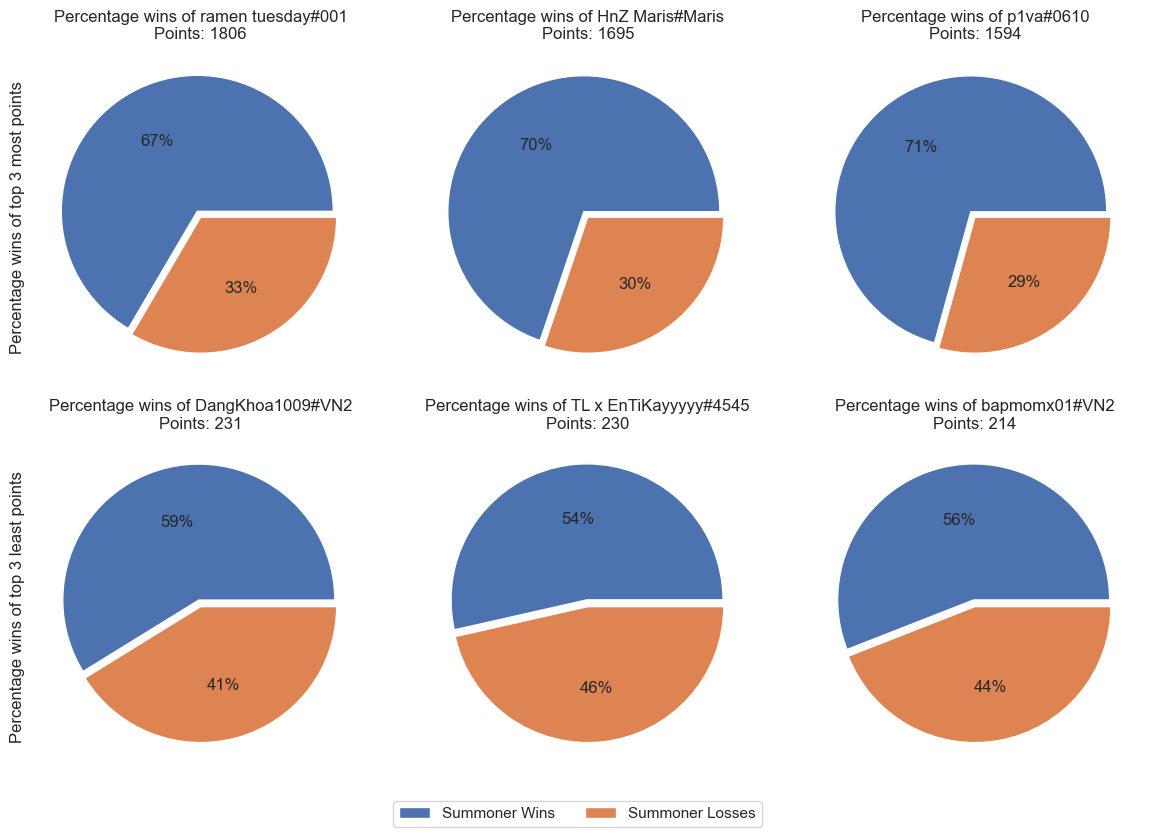

In [14]:
fig, ax = plt.subplots(nrows=2, ncols=3, figsize=(12, 8))

for idx_row, arr in enumerate(array):
    for idx_col, row in enumerate(arr.iterrows()):
        summoner_data = row[1]
        wedges, texts, autotexts = ax[idx_row, idx_col].pie(summoner_data[labels], explode=explode,
                                                            autopct='%.0f%%', labels=None)
        ax[idx_row, idx_col].set_title(f"Percentage wins of {summoner_data['Riot Games Name']}"
                                       f"#{summoner_data['Riot Games Tag Line']}\n" 
                                       f"Points: {summoner_data['Summoner Points']}")
    
    ax[idx_row, 0].set_ylabel(title[idx_row])
    
fig.legend(wedges, labels, loc='lower center', bbox_to_anchor=(0.5, -0.05), ncol=len(labels))
plt.tight_layout()
plt.show()

It's evident that the top 3 summoners with the most points have a notable percentage of wins, with all of them boasting over 67% win rates. In contrast, the top 3 summoners with the least points exhibit a lower percentage of wins, hovering around 57%